In [1]:
import pandas as pd
import numpy as np

np.random.seed(seed=12)

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [56]:
data = pd.read_csv("./train.csv", encoding="utf-8")

In [57]:
data.head(10)

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01T00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01T00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01T01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01T02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01T03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237
5,5,2014-01-01T03:53:35.002,0,-3708.453525,-34767.115528,-7863.224747,1.136613,-1.651984,2.660079,-3726.986435,-34749.558551,-7921.459045,1.133861,-1.655467,2.659121
6,6,2014-01-01T04:40:18.003,0,-437.699227,-38249.612548,-234.351187,1.183619,-0.846348,2.752309,-463.278088,-38241.966025,-293.331552,1.181359,-0.849775,2.752681
7,7,2014-01-01T05:27:01.003,0,2863.147037,-39594.503233,7420.538280,1.162076,-0.128606,2.687907,2831.900642,-39595.997138,7364.088245,1.160316,-0.131566,2.689303
8,8,2014-01-01T06:13:44.004,0,6031.593902,-39056.319613,14731.102545,1.091816,0.497608,2.512783,5996.014434,-39065.326088,14679.572942,1.090515,0.495341,2.514879
9,9,2014-01-01T07:00:27.004,0,8950.655291,-36886.362968,21432.111677,0.985854,1.036692,2.256930,8911.952800,-36900.814799,21387.028371,0.984956,1.035218,2.259425


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649912 entries, 0 to 649911
Data columns (total 15 columns):
id        649912 non-null int64
epoch     649912 non-null object
sat_id    649912 non-null int64
x         649912 non-null float64
y         649912 non-null float64
z         649912 non-null float64
Vx        649912 non-null float64
Vy        649912 non-null float64
Vz        649912 non-null float64
x_sim     649912 non-null float64
y_sim     649912 non-null float64
z_sim     649912 non-null float64
Vx_sim    649912 non-null float64
Vy_sim    649912 non-null float64
Vz_sim    649912 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 74.4+ MB


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


predicted=-12962.357481, expected=-13719.931671
predicted=-7571.003638, expected=-7715.394773
predicted=-3703.584270, expected=-3767.712866
predicted=-1020.343455, expected=-1098.140414
predicted=811.187425, expected=788.161465
predicted=2213.296961, expected=2173.178402
predicted=3185.581699, expected=3222.333803
predicted=4029.813791, expected=4036.918946
predicted=4539.513914, expected=4681.020621
predicted=5794.646694, expected=5195.630793
predicted=5307.325182, expected=5606.127283
predicted=5739.706737, expected=5926.003857
predicted=6337.326955, expected=6158.086347
predicted=6487.868870, expected=6293.498096
predicted=6495.552791, expected=6307.758013
predicted=5912.513917, expected=6152.045256
predicted=5819.750128, expected=5734.801310
predicted=5215.820511, expected=4881.755589
predicted=3571.566446, expected=3243.724935
predicted=-139.235044, expected=76.383702
predicted=-6298.189604, expected=-6170.449347
predicted=-16957.924634, expected=-16857.687470
predicted=-25465.556

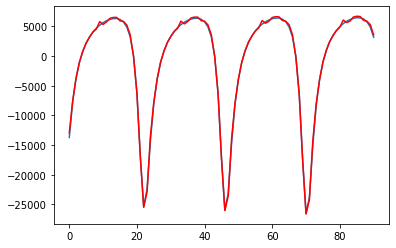

In [127]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

def smape(satellite_predicted_values, satellite_true_values):  
    return np.mean(np.abs((satellite_predicted_values - satellite_true_values) / (np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))

def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

best = 100
model = AR(train)
model_fit = model.fit(maxlag=70)
window = model_fit.k_ar
coef = model_fit.params
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(window)
error = smape(test, predictions)
print('Test smape: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [128]:
ids = [i for i in range(600)]

test_frame = pd.DataFrame()
test_frame["sat_id"] = data["sat_id"]

for column in ["x", "y", "z", "Vx", "Vy", "Vz"]:
    test_frame[f"label_{column}"] = data[column] - data[f"{column}_sim"]
    
test_frame.head()

,sat_id,label_x,label_y,label_z,label_Vx,label_Vy,label_Vz
0,0,-12.692409,-20.441543,13.262073,-0.000776,-0.003506,0.002050
1,0,-12.172318,-29.543301,21.276285,0.001114,-0.002801,0.003673
2,0,-6.825572,-34.527552,32.888826,0.002555,-0.000734,0.004387
3,0,1.368937,-33.237259,44.637815,0.003163,0.001440,0.003809
4,0,10.266521,-26.790192,53.492019,0.003125,0.002887,0.002466


In [130]:
from collections import defaultdict
%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import pickle
import gzip

class Model:
    
    def __init__(self):
        self.x = defaultdict()
        self.y = defaultdict()
        self.z = defaultdict()
        self.Vx = defaultdict()
        self.Vy = defaultdict()
        self.Vz = defaultdict()


for id_ in tqdm(range(600)):
    model = Model()
    for column in ["label_x" ,"label_y", "label_z", "label_Vx", "label_Vy", "label_Vz"]:
        train_ = test_frame.loc[test_frame["sat_id"]==id_][column]
        train = train_.values
        model_ = AR(train)
        model_fit = model_.fit(maxlag=70, disp=False)
        window = model_fit.k_ar
        coef = model_fit.params
        history = [train[i] for i in range(len(train))]
        model.__dict__[f"{column.split('_')[1]}"]["coef"] = coef
        model.__dict__[f"{column.split('_')[1]}"]["history"] = history
        model.__dict__[f"{column.split('_')[1]}"]["window"] = window
    file = gzip.GzipFile(f"./Models/{id_}.pickle", 'wb')
    pickle.dump(model, file, -1)
    file.close()

ERROR:root:Line magic function `%capture` not found (But cell magic `%%capture` exists, did you mean that instead?).


In [131]:
test_data = pd.read_csv("./test.csv")

In [132]:
# del data
test_data.head()

,id,sat_id,epoch,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,3927,1,2014-02-01T00:01:45.162,-13366.891347,-14236.753503,6386.774555,4.333815,-0.692764,0.810774
1,3928,1,2014-02-01T00:22:57.007,-7370.434039,-14498.771520,7130.411325,5.077413,0.360609,0.313402
2,3929,1,2014-02-01T00:44:08.852,-572.068654,-13065.289498,7033.794876,5.519106,2.012830,-0.539412
3,3930,1,2014-02-01T01:05:20.697,6208.945257,-9076.852425,5548.296900,4.849212,4.338955,-1.869600
4,3931,1,2014-02-01T01:26:32.542,10768.200284,-2199.706707,2272.014862,1.940505,6.192887,-3.167724


In [134]:
results = pd.DataFrame()

ids = test_data["sat_id"].unique().tolist()

for id_ in tqdm(ids):
    for_id = pd.DataFrame()
    for column in ["x_sim" ,"y_sim", "z_sim", "Vx_sim", "Vy_sim", "Vz_sim"]:
        to_predict = test_data.loc[test_data["sat_id"] == id_][column]
        length = len(to_predict)
        attr = column.split('_')[0]
        predictions = list()
        file = gzip.GzipFile(f"./Models/{id_}.pickle", "rb")
        models = pickle.load(file)
        file.close()
        history = models.__dict__[attr]["history"]
        coef = models.__dict__[attr]["coef"]
        window = models.__dict__[attr]["window"]
        predictions = []
        for t in range(len(to_predict)):
            length = len(history)
            lag = [history[i] for i in range(length-window,length)]
            yhat = coef[0]
            for d in range(window):
                yhat += coef[d+1] * lag[window-d-1]
                predictions.append(yhat)
                history.append(yhat)
        for_id[attr] = [x + y for x, y in zip(predictions, to_predict.values)]
        for_id[attr] = for_id[attr].T
    results = pd.concat([results, for_id], axis = 0, ignore_index=True)

In [135]:
results["id"] = test_data["id"]

In [136]:
# must be 284072 rows
results.shape

(284071, 7)

In [139]:
results = results[["id","x" ,"y", "z", "Vx" ,"Vy", "Vz"]]
results.head()

,id,x,y,z,Vx,Vy,Vz
0,3927,-26793.839655,-8299.262966,6315.513666,2.566573,-0.872613,0.949930
1,3928,-15237.492277,-11666.877060,7154.028133,4.487309,0.054803,0.419715
2,3929,-8737.338975,-10341.944304,7066.974096,4.446630,1.824635,-0.436829
3,3930,-2427.819745,-6167.866815,5575.802323,4.037445,4.083236,-1.761065
4,3931,2332.739114,1070.525026,2289.726715,1.078877,5.895930,-3.059819


In [138]:
results.to_csv(path_or_buf="./results.csv", index=False)